<a href="https://colab.research.google.com/github/achmadbadri/UjiCoba/blob/main/Final_Code_4_18_2021_Dengan_F1_Score_dan_AUC_GARUDA_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style
from google.colab import files
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,12,31)
df = web.DataReader("GIAA.JK", 'yahoo', start, end) 

# get 2019 data to test our model on 
start = datetime.datetime(2018,11,13)
end = datetime.datetime(2019,12,31)
test_df = web.DataReader("GIAA.JK", 'yahoo', start, end) 
print(df.shape)
print(test_df.shape)

(1251, 6)
(292, 6)


In [3]:
# Create train set of adj close prices data:
train_data = df.loc[:,'Adj Close'].to_numpy()
print(train_data.shape) # 1258 


# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

(1251,)


In [4]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))

print(X_train.shape)


# Visualizing our data with prints: 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(1215, 36, 1)
X_train:
[[495.94219971]
 [481.06393433]
 [487.01522827]
 [486.02334595]
 [495.94219971]
 [491.97467041]
 [493.95843506]
 [491.97467041]
 [491.97467041]
 [491.97467041]
 [486.02334595]
 [486.02334595]
 [485.03146362]
 [485.03146362]
 [484.0395813 ]
 [486.02334595]
 [481.06393433]
 [476.10452271]
 [481.06393433]
 [479.08016968]
 [481.06393433]
 [478.08828735]
 [478.08828735]
 [479.08016968]
 [479.08016968]
 [479.08016968]
 [477.09640503]
 [478.08828735]
 [480.072052  ]
 [479.08016968]
 [480.072052  ]
 [479.08016968]
 [480.072052  ]
 [480.072052  ]
 [479.08016968]
 [479.08016968]]


y_train: [[479.08016968]]



In [31]:
# Build the model 
model = keras.Sequential()

model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = False))
#model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16,  activation='relu'))
model.add(Dense(units = 1, activation= 'linear'))
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
85/85 [==============================] - 7s 49ms/step - loss: 0.0601 - val_loss: 0.0011
Epoch 2/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 3/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 4/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0022 - val_loss: 6.9344e-04
Epoch 5/20
85/85 [==============================] - 3s 38ms/step - loss: 0.0016 - val_loss: 8.2565e-04
Epoch 6/20
85/85 [==============================] - 3s 38ms/step - loss: 0.0018 - val_loss: 9.7710e-04
Epoch 7/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0015 - val_loss: 5.4460e-04
Epoch 8/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0014 - val_loss: 6.2473e-04
Epoch 9/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0012 - val_lo

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________


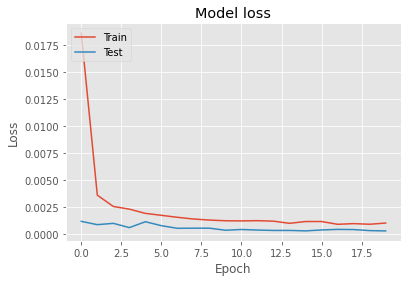

In [7]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = test_df['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
true = y_test
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
pred = predicted_y
predicted_y = scaler.inverse_transform(predicted_y)


In [9]:
# MSE
difference_array = np.subtract(true, pred)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE : %.2f" % mean_squared_error(true, pred, squared=False))

# The MAE
print("MAE : %.2f" % mean_absolute_error(true, pred))

#Mean Absolute Percentange Error
MAPE = (np.mean(np.abs((true - pred) / true))) * 100
print('MAPE : ', MAPE)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(true, pred))

MSE : 0.0025260645938599067
RMSE : 0.05
MAE : 0.04
MAPE :  5.827968551581036
R2 score: 0.92


We choose the mean square error MSE of all samples as our metric. It can be calculated through Eqn. (47) using test set. Notice that the MSE we calculated are derived from normalized data. That's because there exists huge value gap among dierent stocks. if we use original stock price to evaluate error, the error of high price stocks would probably be much more larger than low price ones, which implies models perform better on high price stocks would very likely to have better overall performance. Thus the performance on low price stocks would become dispensable. To avoid the bias caused by the aforementioned problem we evaluate the error with normalized stock price ranged from -1 to 1. (Li, H., Shen, Y., dan Zhu, Y. 2018. Stock Price Prediction Using attention-based Multi-Input LSTM)

In [10]:
predicted_y = pd.DataFrame(predicted_y)
org_y = pd.DataFrame(org_y)
describe = pd.DataFrame()
describe['True Price'] = org_y[0]
describe['Prediction'] = predicted_y[0]
describe['difference'] = org_y[0] - predicted_y[0]
describe['MAPE (%)'] = abs(describe['difference']/org_y[0]*100)
describe.describe()

,True Price,Prediction,difference,MAPE (%)
count,256.000000,256.000000,256.000000,256.000000
mean,474.242188,467.502136,6.740032,3.223256
std,75.265985,73.932632,20.838977,3.243456
min,290.000000,291.619202,-77.371765,0.031748
25%,420.000000,415.838387,-4.523514,0.938155
50%,484.000000,480.424667,4.527985,2.113085
75%,521.250000,511.455811,15.675255,4.434707
max,630.000000,618.811401,110.236908,21.829091


In [11]:
describe.head(10)

,True Price,Prediction,difference,MAPE (%)
0,290.0,291.619202,-1.619202,0.558345
1,314.0,296.506836,17.493164,5.571071
2,312.0,303.105103,8.894897,2.850929
3,306.0,307.906860,-1.906860,0.623157
4,318.0,308.996429,9.003571,2.831311
5,318.0,311.453644,6.546356,2.058603
6,320.0,313.708191,6.291809,1.966190
7,322.0,315.852966,6.147034,1.909017
8,312.0,317.938507,-5.938507,1.903368
9,310.0,316.681458,-6.681458,2.155309


In [12]:
a = np.array(describe['True Price'])
b = np.array(describe['Prediction'])

# MSE
difference_array = np.subtract(a, b)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
print("RMSE: %.2f" % mean_squared_error(a, b, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(a, b))

#Mean Absolute Percentange Error
c = (np.mean(np.abs((a - b) / a))) * 100
print('MAPE : ', c)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(a, b))



MSE : 477.9946562164005
RMSE: 21.86
MAE: 15.26
MAPE :  3.2232561014955854
R2 score: 0.92


In [13]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

38/38 [==============================] - 1s 16ms/step - loss: 6.4216e-04
0.0006421563448384404
8/8 [==============================] - 1s 17ms/step - loss: 0.0025
0.0025260646361857653


In [14]:
print(model.metrics_names)

['loss']


In [15]:
graph  = test_df.drop(test_df.index[0:36])
graph.reset_index(inplace=True)
graph.rename(columns = {'index':'Date'})
graph = graph.drop(columns=['High','Low','Open','Volume','Close'])
graph['Predict_Value'] = predicted_y[0]
graph.head()
graph.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

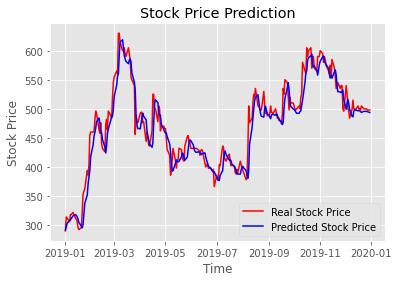

In [16]:
# plot the results 
plt.plot(graph['Adj Close'], color = 'red', label = 'Real Stock Price')
plt.plot(graph['Predict_Value'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(df['Adj Close'], color = 'black', label = 'Past Stock')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [17]:
final  = test_df.drop(test_df.index[0:36])
final.reset_index(inplace=True)
final.rename(columns = {'index':'Date'})
final = final.drop(columns=['High','Low','Open','Volume','Close'])
final['Predict_Value'] = predicted_y[0]
final['Selisih'] = final['Adj Close'] - final['Predict_Value']
final['Lost/Risk (%)'] = abs((final['Adj Close'] - final['Predict_Value'])/final['Predict_Value']*100)
final = final.drop(columns=['Adj Close'])

In [18]:
percent = test_df.drop(test_df.index[0:35])
percent = percent.drop(test_df.index[-1])
percent.reset_index(inplace=True)
percent.rename(columns = {'index':'Date'}) 
percent = percent.drop(columns=['High','Low','Open','Volume','Close'])
percent['Next Day'] = predicted_y
percent['Plus or Minus']= percent['Adj Close'] - percent['Next Day']
percent['Next Day (%)']= abs(((percent['Adj Close'] - percent['Next Day'])/percent['Adj Close'])*100)

In [19]:
True_Next_Day = test_df.drop(test_df.index[0:35])
True_Next_Day = True_Next_Day.drop(test_df.index[-1])
True_Next_Day.reset_index(inplace=True)
True_Next_Day.rename(columns = {'index':'Date'}) 
True_Next_Day = True_Next_Day.drop(columns=['High','Low','Open','Volume','Close'])
True_Next_Day['True Next Day'] = org_y
True_Next_Day['True Plus or Minus']= (True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])
True_Next_Day['True Next Day (%)']= abs(((True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])/True_Next_Day['Adj Close'])*100)
True_Next_Day = True_Next_Day.drop(columns=['Adj Close','True Next Day'])

In [20]:
Concating = percent.merge(final, how='outer', on='Date')
Concating = Concating.merge(True_Next_Day, how='outer', on='Date')
#Concating.set_index('Date', inplace=True)
Final_Predict = Concating.copy()
Final_Predict['Harga Saham Hari ini'] = Concating['Adj Close']
Final_Predict['Prediksi Besok'] = Concating['Plus or Minus']
Final_Predict['Harga Besok Sebenarnya'] = Concating['True Plus or Minus']
Final_Predict['Prediksi Besok (%)'] = (Concating['Next Day (%)'])
Final_Predict['Harga Besok Sebenarnya (%)'] = Concating['True Next Day (%)']
Final_Predict['Selisih Prediksi'] = (Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])
Final_Predict['Risk/MAPE(%)'] = abs(((Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])/Final_Predict['Harga Besok Sebenarnya'])*100)
Final_Predict['Risk/MAPE(%)'] = round(Final_Predict['Risk/MAPE(%)'], 2)
Final_Predict = Final_Predict.drop(columns=['Adj Close', 'Next Day', 'Plus or Minus', 'Next Day (%)',
                                            'Predict_Value', 'Selisih', 'Lost/Risk (%)', 'True Plus or Minus',
                                            'True Next Day (%)'])
Final_Predict = Final_Predict.replace(0, np.nan)
Final_Predict = Final_Predict.dropna()
Final_Predict['Prediksi Uptrend'] = Final_Predict['Prediksi Besok'].apply(lambda x: 1 if x >= 0 else 0)
Final_Predict['Asli Uptrend'] = Final_Predict['Harga Besok Sebenarnya'].apply(lambda x: 1 if x >= 0 else 0)
Final_Predict.set_index('Date', inplace=True)
Final_Predict.shape

(229, 9)

In [21]:
Final_Predict.head()

,Harga Saham Hari ini,Prediksi Besok,Harga Besok Sebenarnya,Prediksi Besok (%),Harga Besok Sebenarnya (%),Selisih Prediksi,Risk/MAPE(%),Prediksi Uptrend,Asli Uptrend
Date,,,,,,,,,
2019-01-01,298.0,6.380798,8.0,2.141207,2.684564,1.619202,20.24,1,1
2019-01-02,290.0,-6.506836,-24.0,2.243737,8.275862,-17.493164,72.89,0,0
2019-01-03,314.0,10.894897,2.0,3.469713,0.636943,-8.894897,444.74,1,1
2019-01-04,312.0,4.093140,6.0,1.311904,1.923077,1.906860,31.78,1,1
2019-01-07,306.0,-2.996429,-12.0,0.979225,3.921569,-9.003571,75.03,0,0


In [22]:
pred_uptrend = Final_Predict['Prediksi Uptrend']
true_trend = Final_Predict['Asli Uptrend']

# calculate accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(true_trend, pred_uptrend)
print('Accuracy :', Accuracy)


# calculate prediction
from sklearn.metrics import precision_score
precision = precision_score(true_trend, pred_uptrend, average='binary')
print('Precision : %.3f' % precision)

# calculate recall
from sklearn.metrics import recall_score
recall = recall_score(true_trend, pred_uptrend, average='binary')
print('Recall : %.3f' % recall)

# calculate score
from sklearn.metrics import f1_score
score = f1_score(true_trend, pred_uptrend, average='binary')
print('F1 Score : %.3f' % score)

#AUC Score
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(true_trend, pred_uptrend)
print('AUC Score : ', auc)

Accuracy : 0.5633187772925764
Precision : 0.595
Recall : 0.758
F1 Score : 0.667
AUC Score :  0.528272414870353


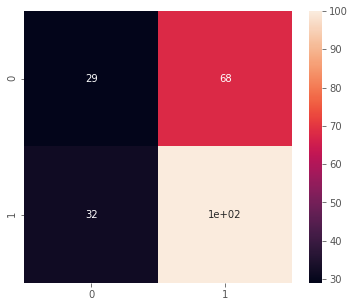

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix(true_trend, pred_uptrend)
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(true_trend, pred_uptrend), annot = True)

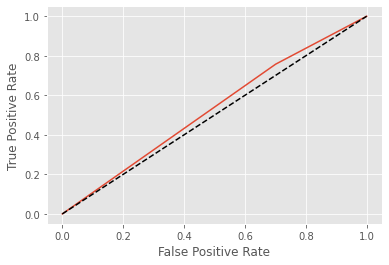

In [24]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(true_trend, pred_uptrend)


import matplotlib.pyplot as plt 
plt.plot(fpr, tpr) 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.plot([0, 1], [0, 1], "k--") 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

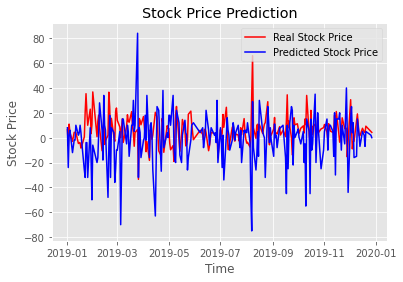

In [25]:
# plot the results 
plt.plot(Final_Predict['Prediksi Besok'], color = 'red', label = 'Real Stock Price')
plt.plot(Final_Predict['Harga Besok Sebenarnya'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(Final_Predict['Risk/MAPE(%)'], color = 'black', label = 'RISK/MAPE(%)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [26]:
#### Mencari Data STAT MODEL

In [27]:
a = X_test
a = np.reshape(a, (-1, 36))
a = scaler.inverse_transform(a)
a = pd.DataFrame(a)

In [28]:
b = y_test
#b = np.reshape(b, (-1, 36))
b = scaler.inverse_transform(b)
b = pd.DataFrame(b)

In [29]:
#OLS Model
import statsmodels.api as sm
X = a
Y = b
X = sm.add_constant(X)
model_ols = sm.OLS(Y,X)
results = model_ols.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.25e-123
Time:                        10:17:46   Log-Likelihood:                -1083.4
No. Observations:                 256   AIC:                             2241.
Df Residuals:                     219   BIC:                             2372.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2666      7.608      2.795      0.006       6.272      36.261
0              0.0482      0.068      0.707      0.480      -0.086       0.183
1             -0.0202      0.093     -0.219      0.827      -0.203       0.162
2             -0.0232      0.093     -0.250      0.803      -0.206       0.160
3             -0.0153      0.095     -0.161      0.872      -0.202       0.172
4              0.0162      0.095      0.170      0.865      -0.171       0.204
5             -0.1294      0.094     -1.370      0.172      -0.316       0.057
6             -0.0008      0.094     -0.009      0.993      -0.186       0.184
7              0.0464      0.093      0.497      0.620      -0.138       0.230
8              0.0053      0.093      0.057      0.955      -0.179       0.189
9              0.0774      0.093      0.830      0.407      -0.106       0.261
10            -0.0339      0.093     -0.364      0.716      -0.217       0.149
11             0.0260      0.093      0.280      0.780      -0.157       0.209
12            -0.0719      0.093     -0.774      0.440      -0.255       0.111
13             0.1145      0.093      1.236      0.218      -0.068       0.297
14            -0.0170      0.093     -0.182      0.856      -0.200       0.167
15            -0.1461      0.092     -1.580      0.115      -0.328       0.036
16             0.0036      0.092      0.040      0.969      -0.178       0.185
17             0.0837      0.092      0.909      0.364      -0.098       0.265
18            -0.0409      0.092     -0.446      0.656      -0.221       0.140
19             0.1672      0.091      1.838      0.067      -0.012       0.346
20             0.0126      0.091      0.138      0.890      -0.167       0.192
21             0.0277      0.091      0.302      0.763      -0.153       0.208
22            -0.1481      0.091     -1.627      0.105      -0.327       0.031
23            -0.0281      0.091     -0.308      0.758      -0.208       0.152
24             0.0077      0.091      0.084      0.933      -0.172       0.188
25             0.0462      0.091      0.506      0.613      -0.134       0.226
26             0.0025      0.091      0.028      0.978      -0.177       0.182
27             0.0077      0.091      0.085      0.933      -0.172       0.188
28             0.0162      0.091      0.178      0.859      -0.164       0.196
29            -0.0599      0.091     -0.656      0.513      -0.240       0.120
30            -0.1134      0.091     -1.246      0.214      -0.293       0.066
31             0.1112      0.091      1.222      0.223      -0.068       0.291
32            -0.0870      0.091     -0.958      0.339      -0.266       0.092
33             0.2280      0.090      2.544      0.012       0.051       0.405
34            -0.0350      0.090     -0.389      0.697      -0.212       0.142
35